In [1]:
library("data.table")
library("qtl")

In [2]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir = "./new_subsets",
                    genfile="20190827_rqtl_all_geno.csv",
                    phefile = "20190827_rqtl_all_pheno.csv" )

 --Read the following data:
	 3055  individuals
	 1013  markers
	 7  phenotypes
 --Cross type: f2 


In [3]:
summary(datf2)

    F2 intercross

    No. individuals:    3055 

    No. phenotypes:     7 
    Percent phenotyped: 100 98.1 98.1 100 100 100 100 

    No. chromosomes:    24 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 

    Total markers:      1013 
    No. markers:        198 150 111 92 82 60 37 37 31 25 21 21 20 20 17 14 13 12 
                        11 11 8 8 7 7 
    Percent genotyped:  79.7 
    Genotypes (%):      AA:26.7  AB:46.9  BB:26.4  not BB:0.0  not AA:0.0 

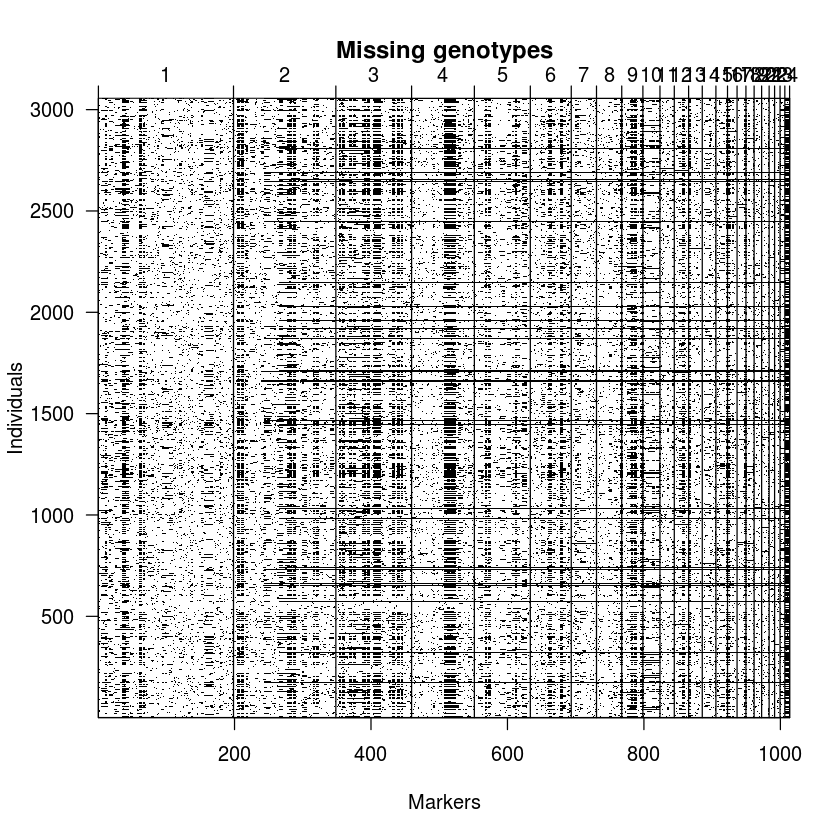

In [5]:
plotMissing(datf2)

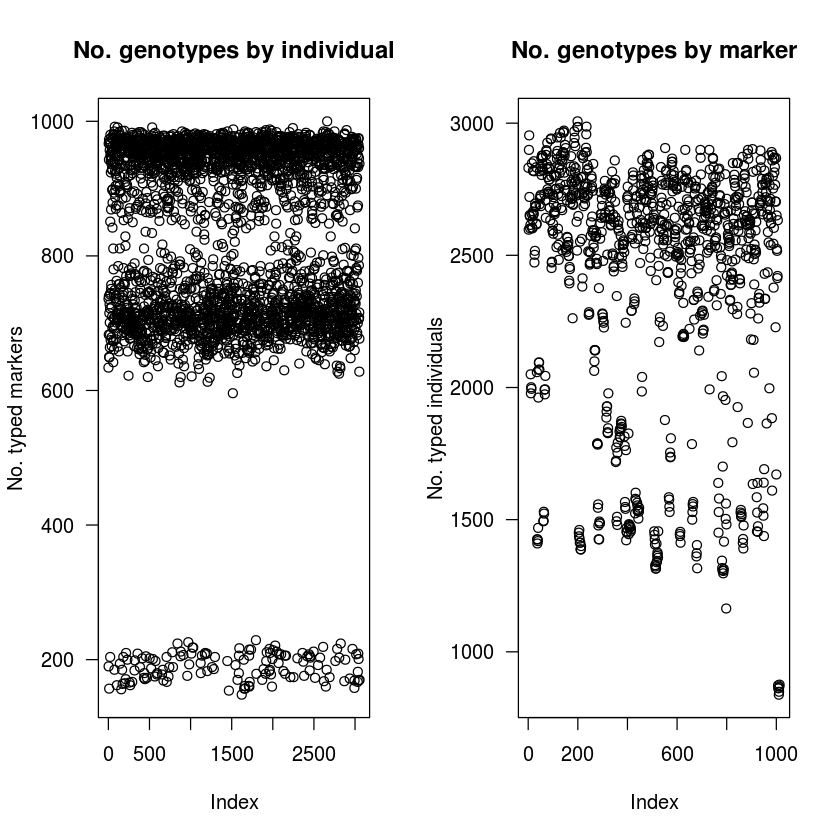

In [6]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [7]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 500])


In [8]:
todrop

character(0)

In [9]:
datf2.1 <- drop.markers(datf2, todrop)

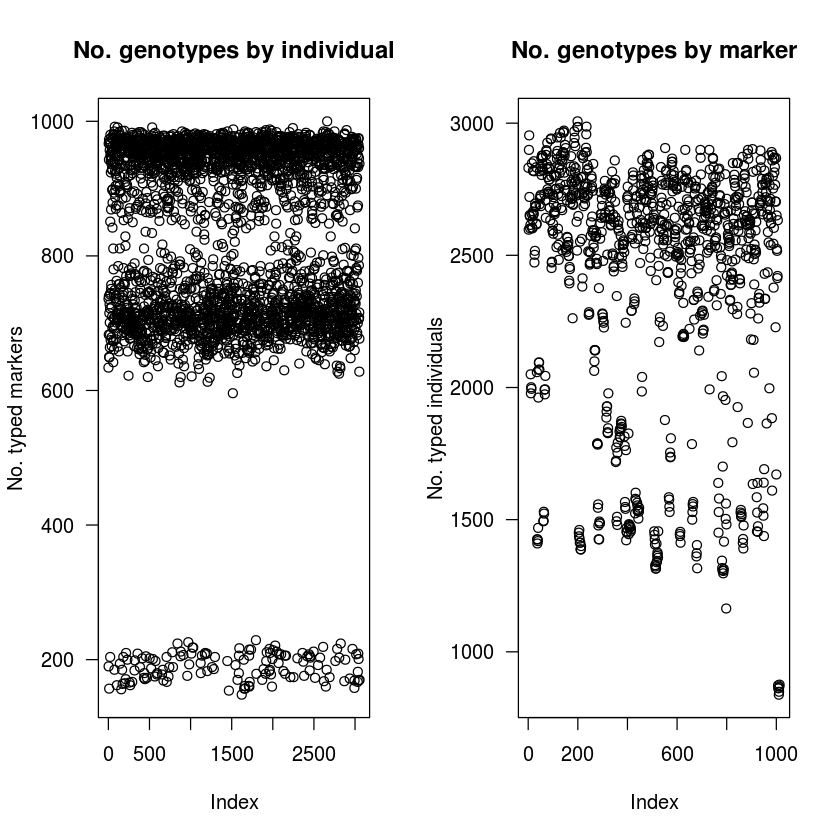

In [10]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [11]:
datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>100)) # removing all individuals that have less than 10% of all markers


In [12]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 3055

[1] 3055

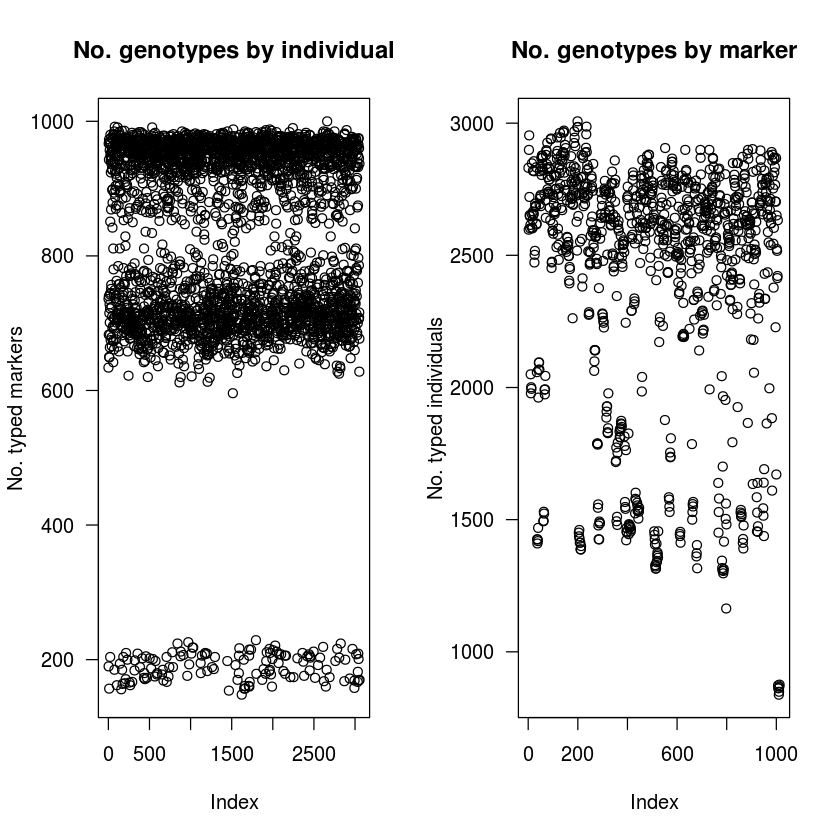

In [13]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [14]:
summary(datf2.2)

    F2 intercross

    No. individuals:    3055 

    No. phenotypes:     7 
    Percent phenotyped: 100 98.1 98.1 100 100 100 100 

    No. chromosomes:    24 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 

    Total markers:      1013 
    No. markers:        198 150 111 92 82 60 37 37 31 25 21 21 20 20 17 14 13 12 
                        11 11 8 8 7 7 
    Percent genotyped:  79.7 
    Genotypes (%):      AA:26.7  AB:46.9  BB:26.4  not BB:0.0  not AA:0.0 

In [15]:
cg <- comparegeno(datf2.2)

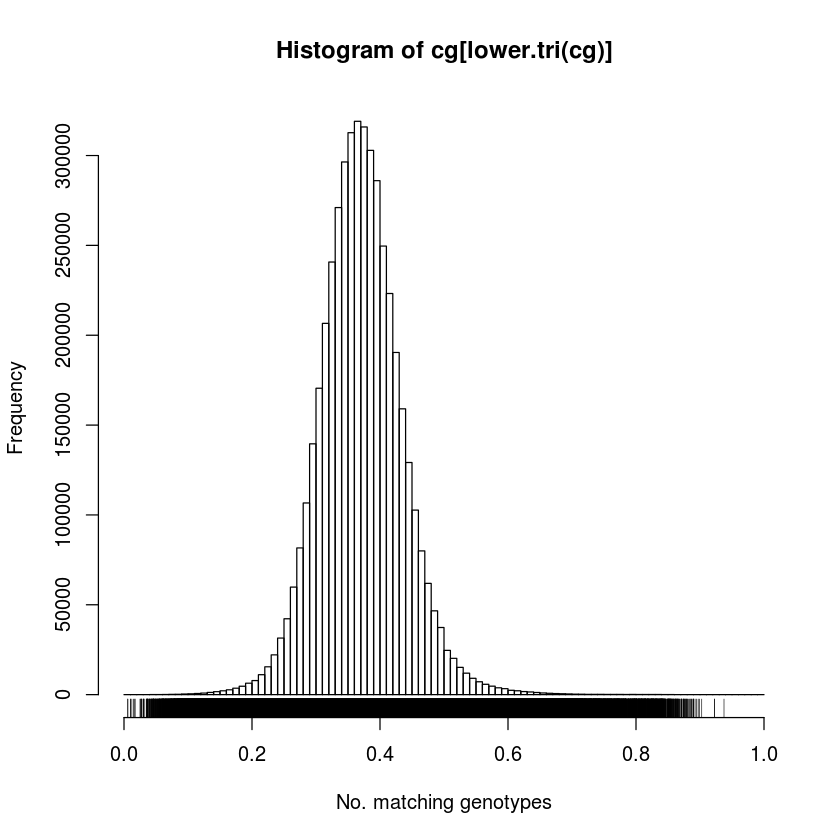

In [16]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [17]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [18]:
wh

row,col
3,771
541,1957
380,2237
641,2279


In [19]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`8-15`
[1] "8-16"



In [20]:
gt <- geno.table(datf2.2)

Warning message in getsex(cross):
"Sex column should be coded as 0=female 1=male; sex ignored."

In [21]:
gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
datf2.3 <- drop.markers(datf2.2, todrop)

,chr,missing,AA,AB,BB,not.BB,not.AA,P.value
1-2,1,458,441,1314,842,0,0,1.069075e-27
1-3,1,156,495,1412,992,0,0,3.755319e-38
1-4,1,101,541,1393,1020,0,0,1.559740e-36
1-5,1,334,526,1343,852,0,0,8.703552e-18
1-6,1,403,513,1318,821,0,0,2.779739e-16
1-7,1,407,514,1312,822,0,0,2.478929e-16
1-8,1,453,521,1276,805,0,0,2.134212e-14
1-9,1,440,537,1275,803,0,0,7.909171e-13
1-14,1,398,544,1332,781,0,0,6.531408e-10
1-24,1,237,802,1409,607,0,0,1.379744e-06


In [22]:
length(todrop)

[1] 569

In [23]:
datf2.3 <- datf2.2

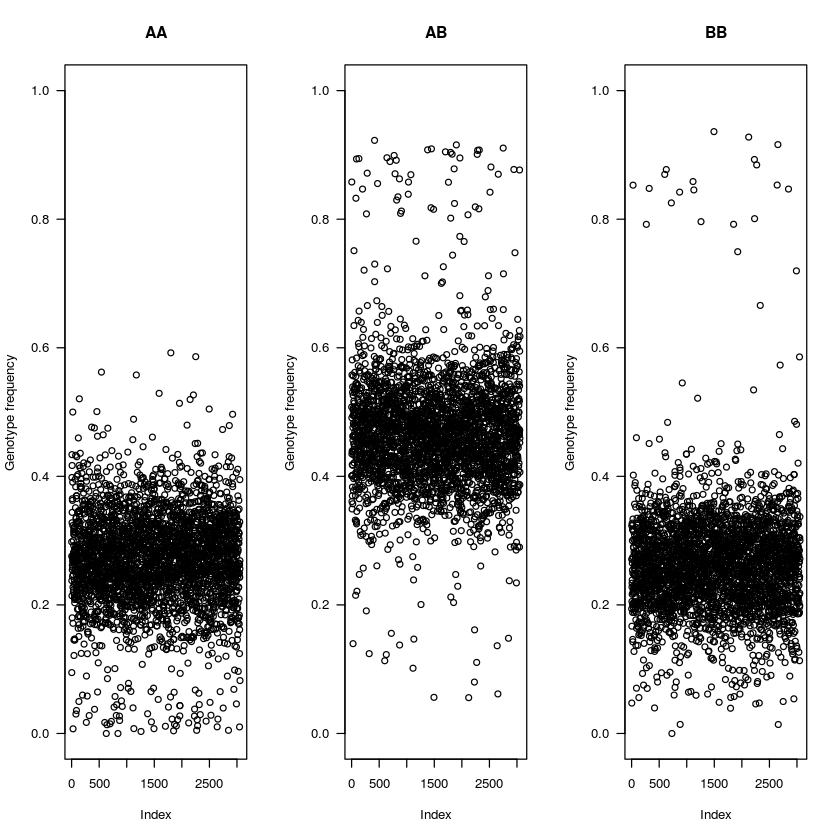

In [24]:
g <- pull.geno(datf2.2)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [ ]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [25]:
id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [ ]:
datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [26]:
datf2.4 <- datf2.3

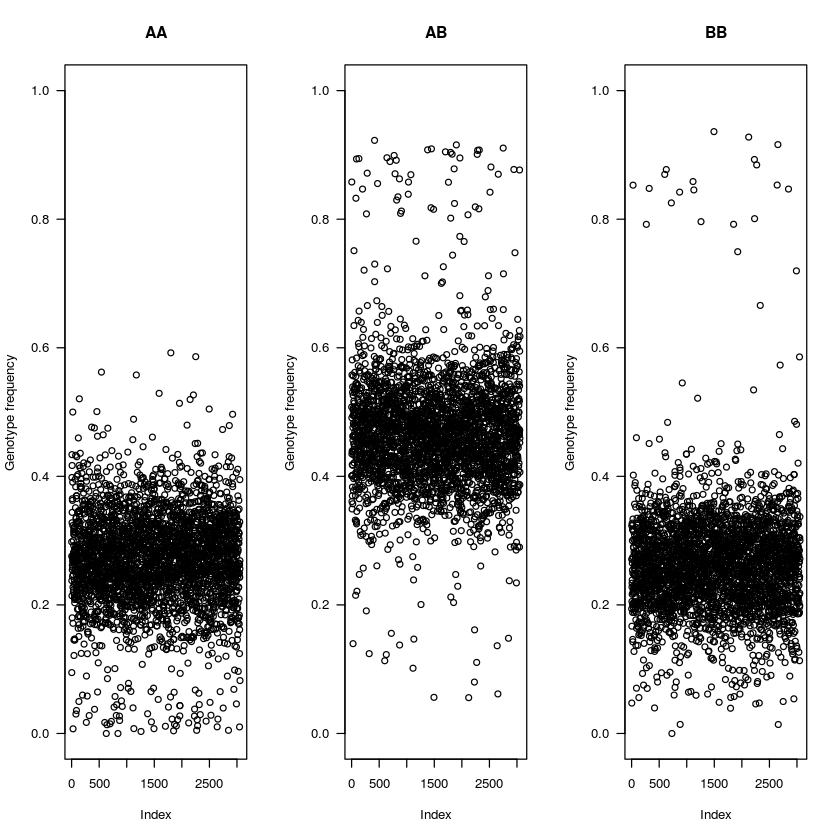

In [27]:
g <- pull.geno(datf2.4)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [28]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

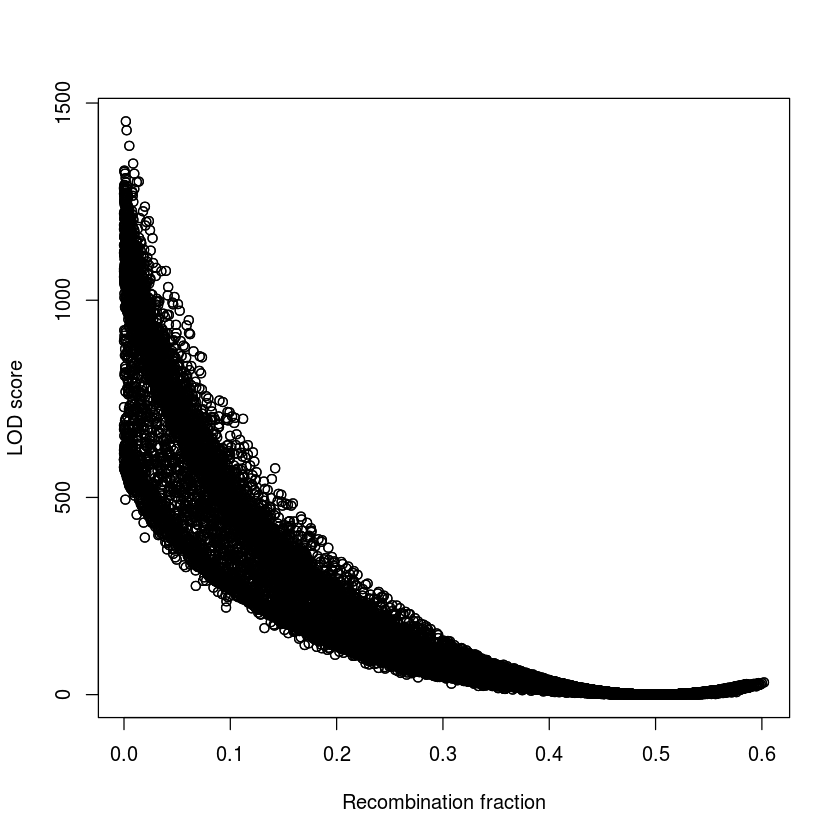

In [29]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

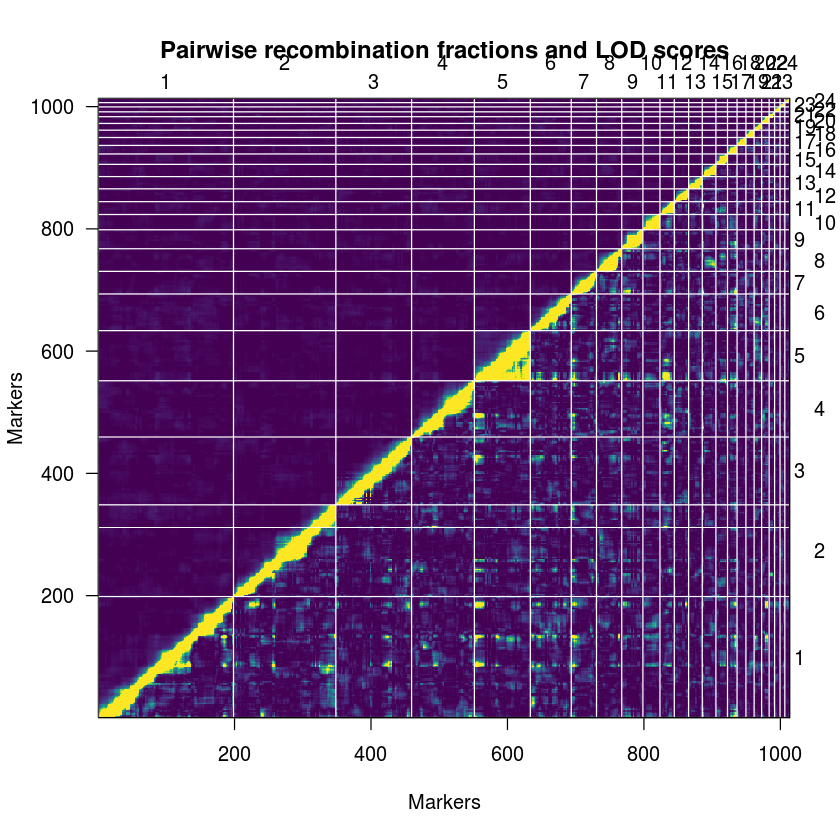

In [30]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [ ]:
genmap <- est.map(datf2.4, error.prob=0.005)

In [ ]:
summaryMap(genmap)

In [ ]:
plotMap(genmap)

In [ ]:
datf2.4 <- replace.map(datf2.4, genmap)

In [ ]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [31]:
datf2.5 <- datf2.4

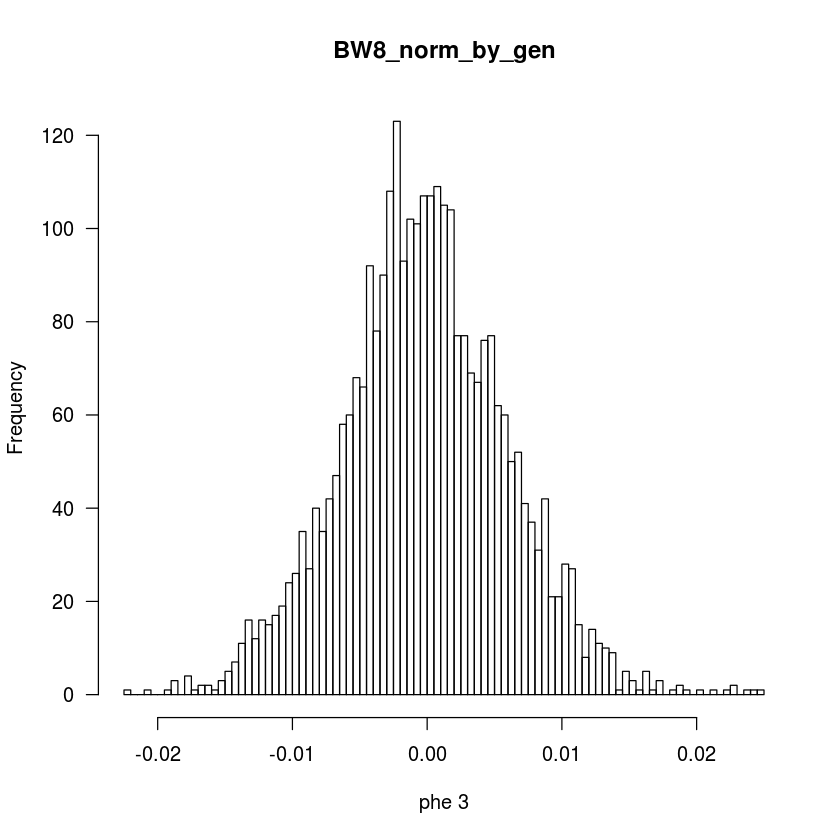

In [85]:
plotPheno(datf2.5, pheno.col=3)

In [ ]:
#plotMissing(datf2.5, reorder=TRUE)

In [33]:
datf2.5 <- calc.genoprob(datf2.5, step=1)

In [34]:
datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)


In [35]:
out.em <- scanone(datf2.5, pheno.col = 2)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"Dropping 58 individuals with missing phenotypes.
"

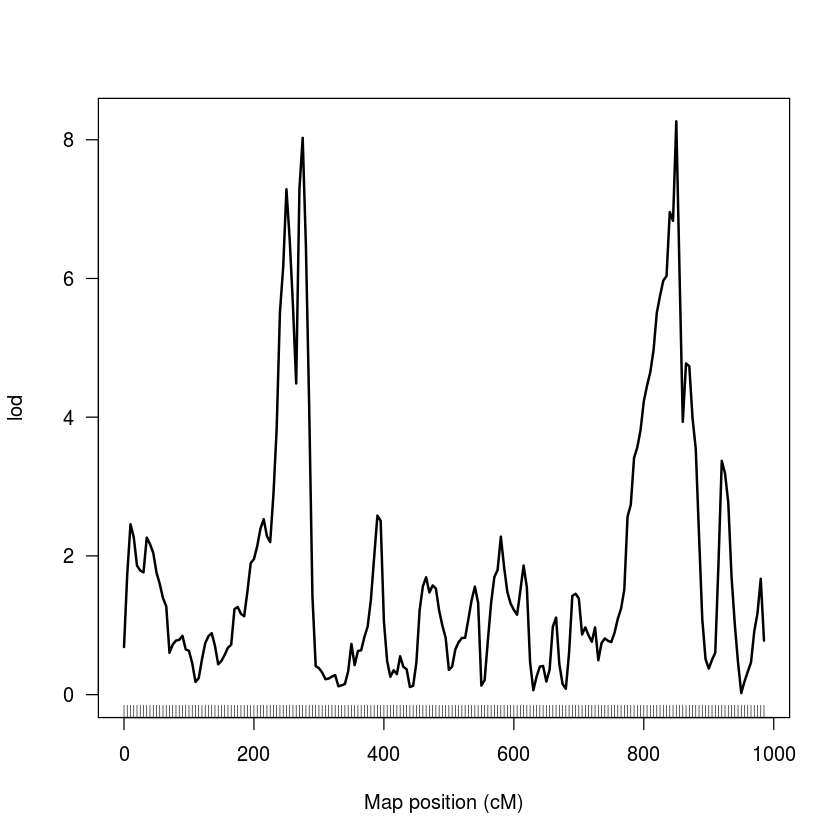

In [36]:
plot(out.em, chr=1)

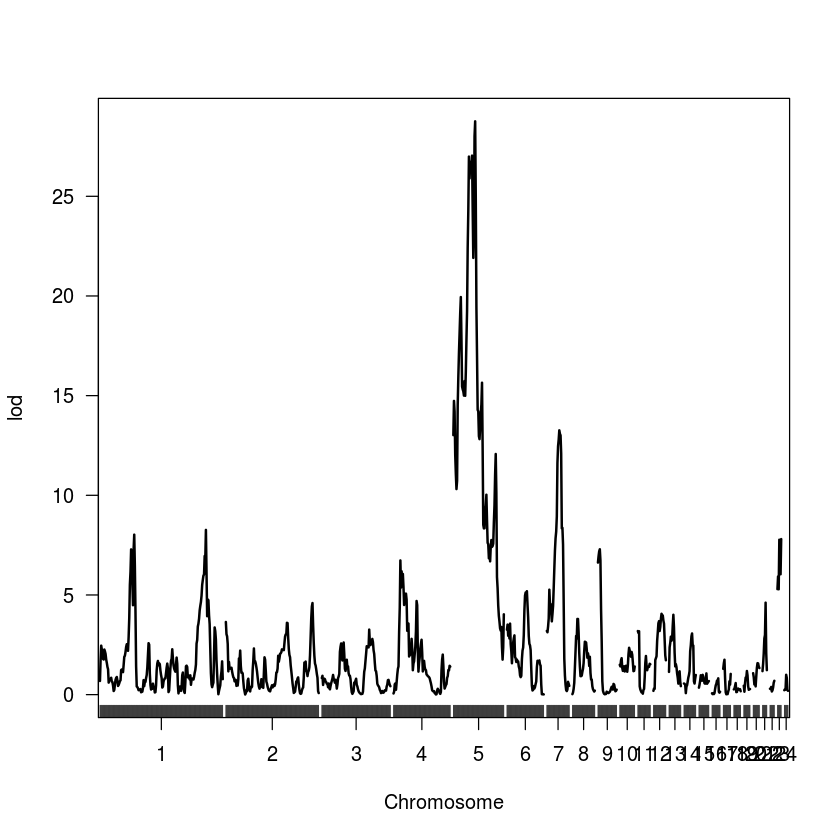

In [37]:
plot(out.em)

In [61]:
ac <- pull.pheno(datf2.5, c("SEX"))

In [66]:
ac2 <- pull.pheno(datf2.5, c("SEX","GENERATION"))

In [75]:
ac3 <- pull.pheno(datf2.5, c("SEX","GENERATION","DAM"))

In [86]:
out.acovar <- scanone(datf2.5, pheno.col = 2, addcovar=ac2)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"Dropping 58 individuals with missing phenotypes.
"

In [88]:
out.acovar2 <- scanone(datf2.5, pheno.col = 3, addcovar=ac)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"Dropping 58 individuals with missing phenotypes.
"

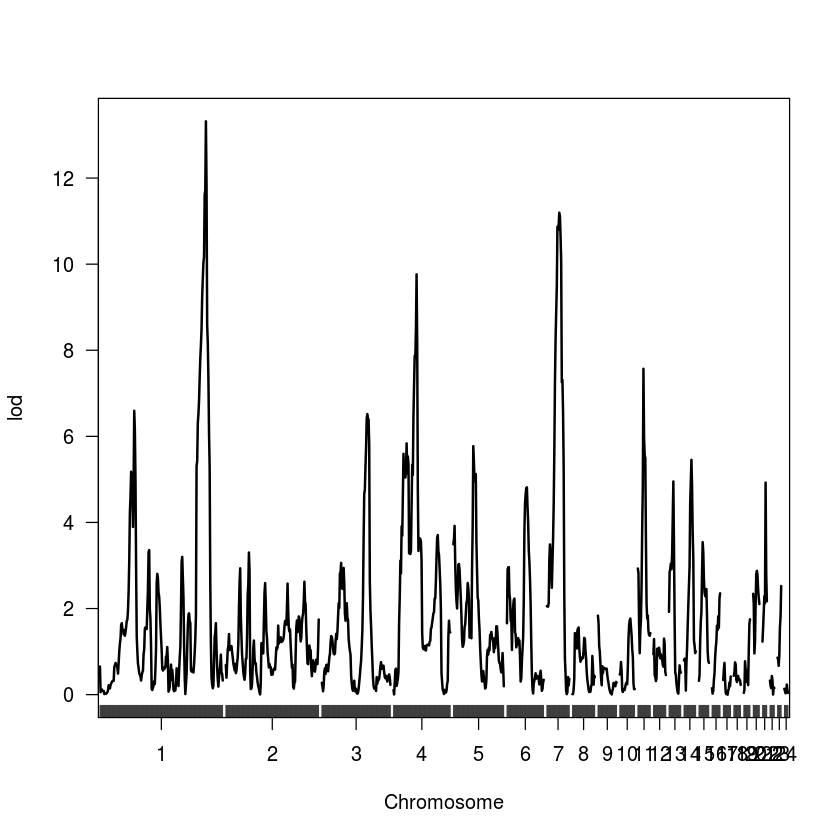

In [96]:
plot(out.acovar2)

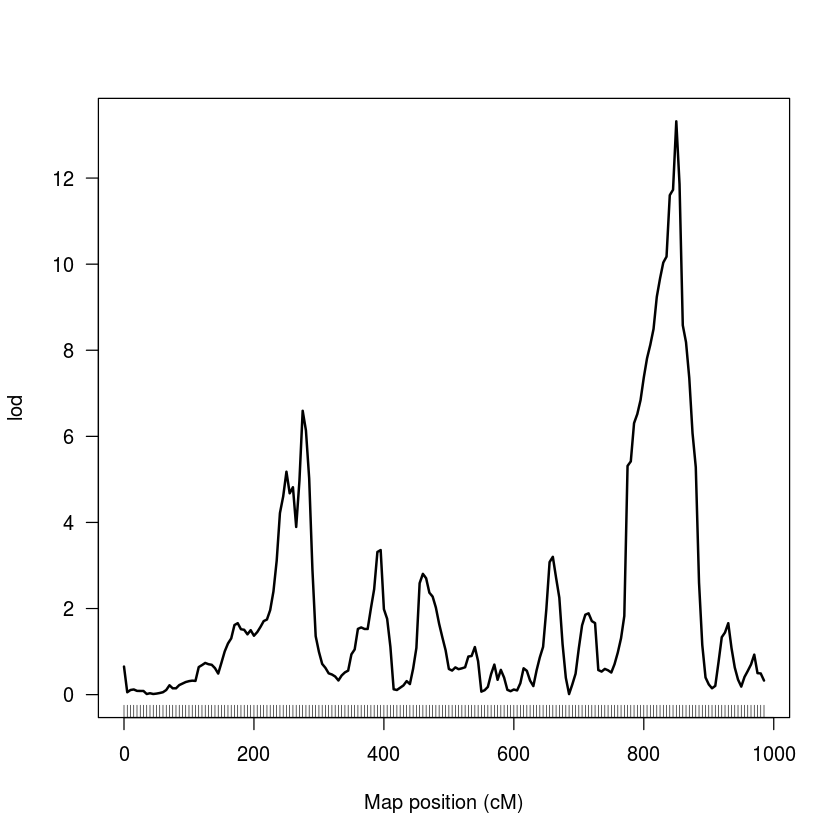

In [97]:
plot(out.acovar2, chr=1)

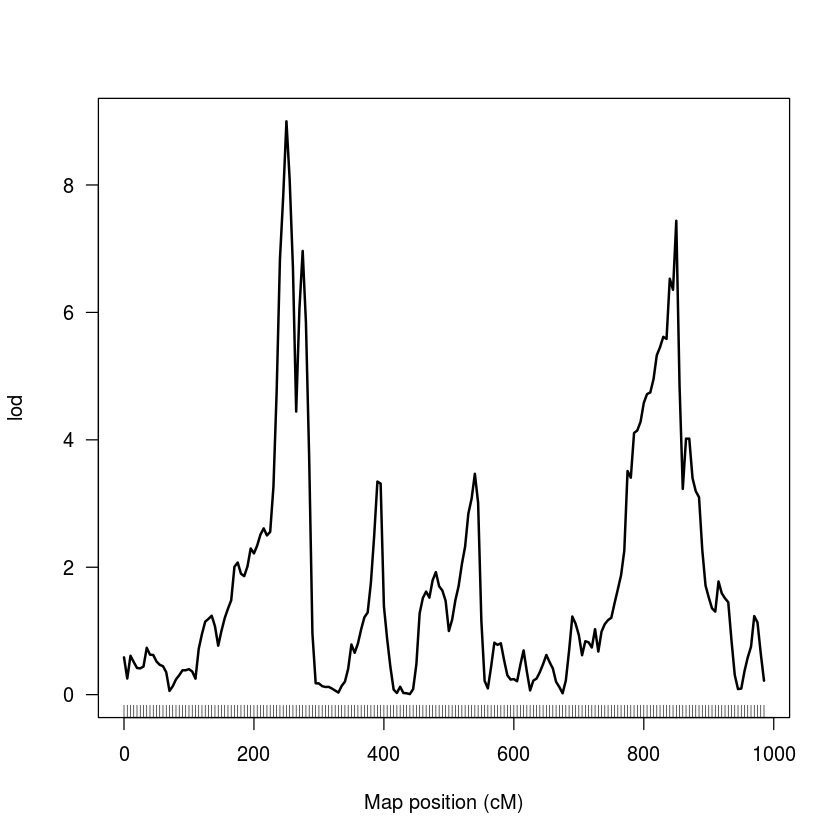

In [84]:
plot(out.acovar, chr=1)

In [98]:
out.acovar2

,chr,pos,lod
1-1,1,0,0.65241793
1-2,1,5,0.05622077
1-3,1,10,0.10781628
1-4,1,15,0.12048366
1-5,1,20,0.08799437
1-6,1,25,0.08625542
1-7,1,30,0.08518095
1-8,1,35,0.01533707
1-9,1,40,0.03300940
1-10,1,45,0.01557329


In [99]:
write.csv(out.acovar2, "20190828_out_all_normbw8_ctrlsex.csv")